In [1]:
from exp import MyAgent
import os

In [7]:
# 序号_比例_batchsize_lr_opt
# for idx, hlayer_num in enumerate([0, 1, 2, 3, 4, 5, 6]):
# [10,20,30,40,50,60,70,80,90], [11339,22679,34019,45359,56699,68038,79378,90718,102058]
# for ratio in [1000, 2000, 3000, 4000, 5000]:
ratio = 100
idx = 2
hlayer_num = 0
basename = f'2_100_32_0.003_sgdm'
args = {
    'model':{
        'name': 'linear',
        'linear':{
            'in_dim':512,
            'h_dim':128,
            'out_dim': 3,
            'hlayer_num': hlayer_num
        },
    },
    'data':{
        'root': './',
        'X_train': f'./data/tr_res18_256_{ratio}_X.npy',
        'y_train':f'./data/tr_res18_256_{ratio}_y.npy',
        'X_test': f'./data/tt_res18_256_{ratio}_X.npy',
        'y_test': f'./data/tt_res18_256_{ratio}_y.npy',
        'ratio': ratio,
        # 'num': num,
    },
    'save':{
        'root':f'./checkpoint/resnet18',
        'record_path':f'./record/{basename}.json',
        'model_path':f'./model/{basename}.pth',
        'opt_path':f'./opt/{basename}.pth',
        'result_path':f'./test/{basename}.npy',
        'prob_path':f'./test/{basename}_prob.npy',
    },
    'train':{
        'lr':0.003,
        'max_epoch':200,
        'device': 'cuda:0',
        'batch_size':32,
        'opt': ('sgd',0.9),
        'scheduler': 50
    },
    'earlystopper':{
        'patience': 30,
        'info': 'dev_loss',
        'mini': True,
    },
    'indicator':{
        'infos': ('train_loss','dev_loss', 'train_acc', 'dev_acc'),
    }
}
Agent = MyAgent(args, continue_train=False, debug=False)
# Agent.train()
# results = Agent.test()
# break
# Agent.test_prob()
# dev_loader = Agent.get_data('dev')
# Agent.plot(index=[2, 3])n

0.7400774808696515


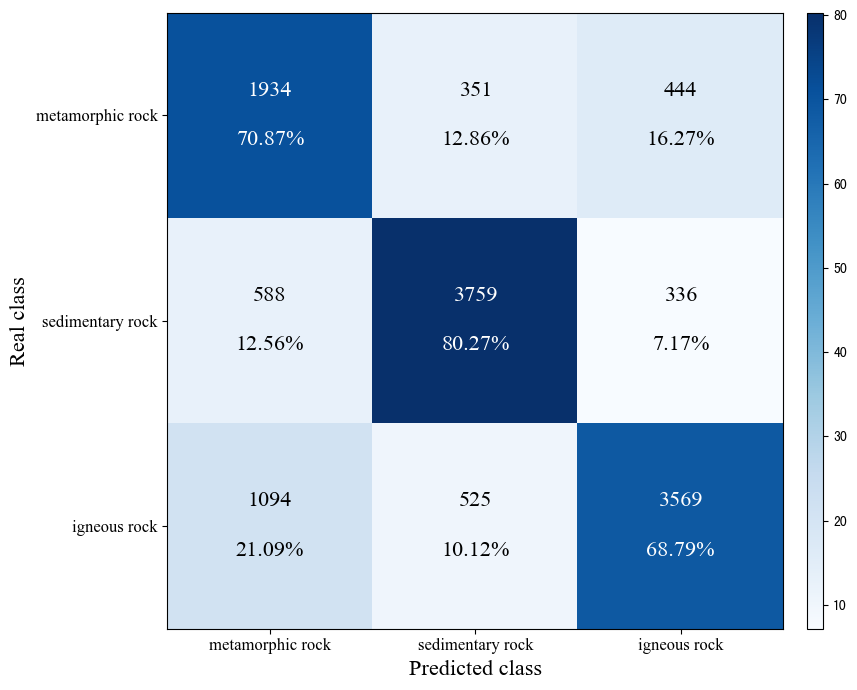

In [9]:
import numpy as np
from pyn.nmp import enable_chinese, fig_axes
from pyn.Ptorch.evaluate import ConfusionMatrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score
import os
enable_chinese()
join = os.path.join
# result
result = np.load(join(args['save']['root'], args['save']['result_path']))
y_true, y_pred = result[1], result[0]
fig = plt.figure(figsize=(8,8))
cm = confusion_matrix(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average="weighted")
print(f1)
cm_prob = cm.astype('float') / cm.sum(axis=1, keepdims=True)
enable_chinese()
ConfusionMatrix(cm, ['metamorphic rock','sedimentary rock', 'igneous rock'],\
                fig, title_size=15, tick_family='E', label_family='E', text_size=16)

In [3]:

import numpy as np
from pyn.nmp import enable_chinese, fig_axes
from pyn.Ptorch.evaluate import ConfusionMatrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import os
enable_chinese()
join = os.path.join
import pandas as pd
df = pd.DataFrame(np.zeros((20, 1)))
for idx, ratio in enumerate([5+5*i for i in range(20)]):
    # for col, ratio2 in enumerate([10,20,30,40,50,60]):
    basename = f'7_{ratio}_32_0.003_sgdm'
    path = f'./checkpoint/resnet18/test/{basename}.npy'
    # result
    result = np.load(path, allow_pickle=True)
    y_true, y_pred = result[1], result[0]
    f1 = f1_score(y_true, y_pred, average="weighted")
    acc = accuracy_score(y_true, y_pred)
    df.iloc[idx, 0] = f1
    print(f'F1={f1:.3f}, Acc={acc*100:.1f}%.')
df.to_csv('../dataForOrigin/总图像数量.csv')

F1=0.593, Acc=57.9%.
F1=0.638, Acc=62.9%.
F1=0.655, Acc=64.5%.
F1=0.677, Acc=67.3%.
F1=0.672, Acc=66.7%.
F1=0.683, Acc=67.5%.
F1=0.683, Acc=67.4%.
F1=0.708, Acc=70.6%.
F1=0.709, Acc=70.7%.
F1=0.707, Acc=70.0%.
F1=0.711, Acc=70.3%.
F1=0.703, Acc=69.6%.
F1=0.724, Acc=71.9%.
F1=0.726, Acc=72.2%.
F1=0.724, Acc=71.7%.
F1=0.733, Acc=72.8%.
F1=0.738, Acc=73.2%.
F1=0.726, Acc=72.0%.
F1=0.733, Acc=72.6%.
F1=0.747, Acc=74.1%.
